## Imports

In [63]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

## Load Dataset

In [50]:
dataset = io.loadmat('Data_hoda_full.mat')

In [51]:
type(dataset)

dict

In [52]:
dataset.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels'])

In [53]:
data = np.squeeze(dataset['Data'])
data.shape

(60000,)

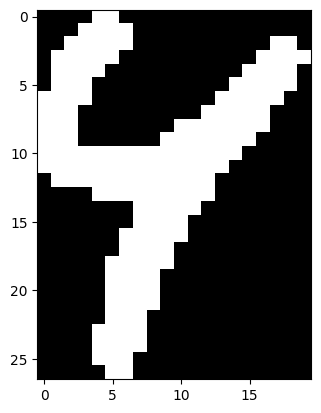

In [54]:
plt.imshow(data[0], cmap='gray')

In [55]:
label = np.squeeze(dataset['labels'])
label.shape

(60000,)

## Train Test Split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=12)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((48000,), (48000,), (12000,), (12000,))

## Resize the samples

In [57]:
x_train_re = [cv2.resize(img, dsize=(20, 20)) for img in x_train]
x_test_re = [cv2.resize(img, dsize=(20, 20)) for img in x_test]

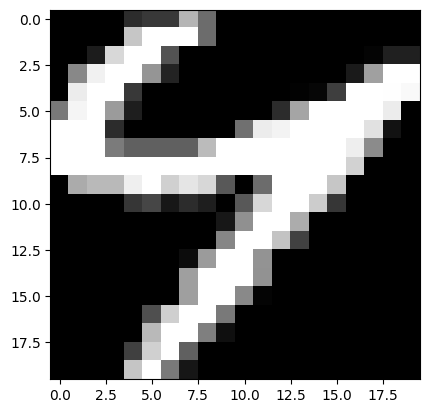

In [58]:
plt.imshow(x_train_re[0], cmap='gray')

## Reshape Data

In [59]:
x_train = np.reshape(x_train_re, [-1, 400])
x_test = np.reshape(x_test_re, [-1, 400])
x_train.shape, x_test.shape

((48000, 400), (12000, 400))

## Train the model and Score

In [60]:
model1 = KNeighborsClassifier(n_neighbors=5, weights='distance')
model1.fit(x_train, y_train)
model1.score(x_test, y_test)

0.9850833333333333

In [61]:
model2 = XGBClassifier(n_estimators=500, max_depth=2, random_state=12)
model2.fit(x_train, y_train)
model2.score(x_test, y_test)

0.991

In [64]:
voting = VotingClassifier(estimators=[('xg', XGBClassifier(n_estimators=500, max_depth=2, random_state=12)),
                                       ('knn', KNeighborsClassifier(n_neighbors=5, weights='distance'))], voting='soft')
voting.fit(x_train, y_train)
voting.score(x_test, y_test)

0.9913333333333333